## Project: Car4u

### Atribute Information

1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

### Import the necessary libraries

In [1]:
# Import libraries.
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##import statsmodels.api as sm

%matplotlib inline

### Reading the dataset

In [2]:
# Load the data into pandas dataframe
usedcar = pd.read_csv("used_cars_data.csv")

In [3]:
uc = usedcar.copy() #Copy the data to avid changes to original data
uc.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Observations 
- Fuel_Type is categorical data and is showing so far 4 unique values
- Mileage is showing as km/HG and KMPL
- New Price is showing missing data

### Check Data Frame Shape, Column and Info

In [4]:
uc.shape

(7253, 14)

In [5]:
uc.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [6]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
S.No.                7253 non-null int64
Name                 7253 non-null object
Location             7253 non-null object
Year                 7253 non-null int64
Kilometers_Driven    7253 non-null int64
Fuel_Type            7253 non-null object
Transmission         7253 non-null object
Owner_Type           7253 non-null object
Mileage              7251 non-null object
Engine               7207 non-null object
Power                7207 non-null object
Seats                7200 non-null float64
New_Price            1006 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### Observations: There are
- 14 columns and 7253 observations. In the columns New_Price is showing 1006 observations indicating that there are missing values.
- 9 categorical type and 5 numerical type, including year. (float64 and int64) 
- New_Price is categorical. Year is numerical.
- Missing values in the columns: Mileage, Engine, Power, Seats, New Price, Price.
- Dependent Variable is Price

### Data Preprocessing

#### Transforming Datatypes

In [7]:
uc.Year = uc.Year.astype('category')
uc.Fuel_Type = uc.Fuel_Type.astype('category')
uc.Transmission = uc.Transmission.astype('category')

#### Transforming the column New_Price in numerical

In [8]:
money_cols = []
for colname in uc.columns[uc.dtypes == 'object']:  # only need to consider string columns
    if uc[colname].str.endswith('Lakh').any():  # using `.str` so I can use an element-wise string method
        money_cols.append(colname)
print(money_cols)

['New_Price']


In [9]:
def newprice_to_num(newprice_val):
    if isinstance(newprice_val, str):  # validation `newprice_val` is a string
        multiplier = 1
        if newprice_val.endswith('Lakh'):
            multiplier = 1
        return float(newprice_val.replace('Lakh', '').replace('Cr','')) * multiplier
    else: 
        return np.nan

for colname in money_cols:
    uc[colname] = uc[colname].apply(newprice_to_num)
    
uc[money_cols].head()

,New_Price
0,NaN
1,NaN
2,8.61
3,NaN
4,NaN


#### Transforming the Column Mileage in Numerical

In [10]:
miles_cols = []
for colname in uc.columns[uc.dtypes == 'object']:  # only need to consider string columns
    if uc[colname].str.endswith('kmpl').any():  # using `.str` so I can use an element-wise string method
        miles_cols.append(colname)
print(miles_cols)

['Mileage']


In [11]:
def miles_to_num(miles_val):
    if isinstance(miles_val, str):  # validation `miles_val` is a string
        multiplier = 1
        if miles_val.endswith('kmpl'):
            multiplier = 1
        elif miles_val.endswith('km/kg'):
            multiplier = 1
        return float(miles_val.replace('kmpl','').replace('km/kg',''))* multiplier
    else:
        return np.nan

for colname in miles_cols:
    uc[colname] = uc[colname].apply(miles_to_num)
    
uc[miles_cols].head()

,Mileage
0,26.60
1,19.67
2,18.20
3,20.77
4,15.20


#### Transforming the column Power in numerical

In [12]:
power_cols = []
for colname1 in uc.columns[uc.dtypes == 'object']:  # only need to consider string columns
    if uc[colname1].str.endswith('bhp').any():  # using `.str` so I can use an element-wise string method
        power_cols.append(colname1)
print(power_cols)

['Power']


In [13]:
def power_to_num(power_val):
    if isinstance(power_val, str):  # validation `power_val` is a string
        multiplier = 1
        if power_val.endswith('bhp'):
            multiplier = 1
        elif power_val.endswith(' 0'):
            multiplier = 1
        elif power_val.startswith('0n0u0l0l00'):
            multiplier = 1
        return float(power_val.replace('bhp','').replace('','0').replace(' 0','0').replace('0n0u0l0l00','0'))*multiplier
    else:
        return np.nan

for colname1 in power_cols:
    uc[colname1] = uc[colname1].apply(power_to_num)
    
uc[power_cols].head()

,Power
0,5080.0106
1,102060.0200
2,8080.0700
3,8080.0706
4,104000.0800


#### Transforming the column Engine in numerical

In [14]:
engine_cols = []
for colname2 in uc.columns[uc.dtypes == 'object']:  # only need to consider string columns
    if uc[colname2].str.endswith('CC').any():  # using `.str` so I can use an element-wise string method
        engine_cols.append(colname2)
print(engine_cols)

['Engine']


In [15]:
def engine_to_num(engine_val):
    if isinstance(engine_val, str):  # validation `engine_val` is a string
        multiplier = 1
        if engine_val.endswith('CC'):
            multiplier = 1
        elif engine_val.endswith(' 0'):
            multiplier = 1
        return float(engine_val.replace('CC','').replace('','0').replace(' 0','0'))*multiplier
    else:
        return np.nan

for colname2 in engine_cols:
    uc[colname2] = uc[colname2].apply(engine_to_num)
    
uc[engine_cols].head()

,Engine
0,9090800.0
1,105080200.0
2,101090900.0
3,102040800.0
4,109060800.0


In [16]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
S.No.                7253 non-null int64
Name                 7253 non-null object
Location             7253 non-null object
Year                 7253 non-null category
Kilometers_Driven    7253 non-null int64
Fuel_Type            7253 non-null category
Transmission         7253 non-null category
Owner_Type           7253 non-null object
Mileage              7251 non-null float64
Engine               7207 non-null float64
Power                7207 non-null float64
Seats                7200 non-null float64
New_Price            1006 non-null float64
Price                6019 non-null float64
dtypes: category(3), float64(6), int64(2), object(3)
memory usage: 645.7+ KB


### Missing Values

In [17]:
uc.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [18]:
uc['Year'] = uc['Year'].cat.add_categories('Unknown') # Replacing NaN with Unknown on Year
uc['Year'].fillna('Unknown', inplace =True)

In [129]:
uc.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3.626000e+03,2.093905e+03,0.00,1.813000e+03,3.626000e+03,5.439000e+03,7.252000e+03
Kilometers_Driven,7253.0,5.869906e+04,8.442772e+04,171.00,3.400000e+04,5.341600e+04,7.300000e+04,6.500000e+06
Mileage,7251.0,1.814158e+01,4.562197e+00,0.00,1.517000e+01,1.816000e+01,2.110000e+01,3.354000e+01
Engine,7207.0,1.157003e+08,5.781971e+07,70200.00,1.010908e+08,1.040903e+08,1.090608e+08,5.090908e+08
Power,7207.0,2.980440e+05,5.438850e+05,0.00,8.050080e+03,8.000000e+04,1.070501e+05,6.010600e+06
Seats,7200.0,5.279722e+00,8.116597e-01,0.00,5.000000e+00,5.000000e+00,5.000000e+00,1.000000e+01
New_Price,1006.0,1.989432e+01,1.981395e+01,1.00,7.635000e+00,1.127000e+01,2.364000e+01,9.992000e+01
Price,6019.0,9.479468e+00,1.118792e+01,0.44,3.500000e+00,5.640000e+00,9.950000e+00,1.600000e+02


#### Observations: 
- Min Kilometer Driven is 171.000 while the Max is 65000000
- Min Price 44 and Max 160.000 
- Mean Price of a used car 9.479
- The New_Price column is low than the Price column due to the high number of missing values on the column New_Price.

### Replacing missing values in every numerical column with its medain

In [19]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = uc.select_dtypes(include=np.number).columns.tolist()
uc[numeric_columns] = uc[numeric_columns].apply(medianFiller,axis=0)

In [20]:
uc.isna().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [21]:
uc.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253,NaN,NaN,NaN,3626,2093.91,0,1813,3626,5439,7252
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,23,2015,929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7253,NaN,NaN,NaN,18.1416,4.56157,0,15.17,18.16,21.1,33.54
Engine,7253,NaN,NaN,NaN,1.15627e+08,5.76434e+07,70200,1.01091e+08,1.0409e+08,1.09061e+08,5.09091e+08


#### Observations 
- Even with the column New_Price have a lot of missing values, I will not drop this column yet.
- The data is showing 11 unique locations
- Most of the cars have Diesel as Fuel - Type

### Checking non numerical values

In [24]:
num_to_display = 10
for colname in uc.dtypes[uc.dtypes == 'object'].index:
    val_counts = uc[colname].value_counts(dropna=False)# shows NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Hyundai Grand i10 Sportz      32
Honda Amaze S i-Dtech         32
Honda City 1.5 V MT           32
Name: Name, dtype: int64
Displaying first 10 of 2041 values.



Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Displaying first 10 of 11 values.



First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64





#### Observations on Objetic data type
- The location in Mumbai is the most popular. 

In [25]:
nonum_to_display = 10
for colname in uc.dtypes[uc.dtypes == 'category'].index:
    val_counts = uc[colname].value_counts(dropna=False)# shows NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > nonum_to_display:
        print(f'Displaying first {nonum_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
Name: Year, dtype: int64
Displaying first 10 of 24 values.



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5204
Automatic    2049
Name: Transmission, dtype: int64





#### Observations on Category Type
- Diesel Fuel type is present in the majority of the used cars
- The oldest cars were manufactured in 2009, while the newest in 929 
- The majority of the cars are Manual Transmission

### Checking Unique Values

In [26]:
uc.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 384
Seats                   9
New_Price             625
Price                1373
dtype: int64

## Univariate Analysis

In [27]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

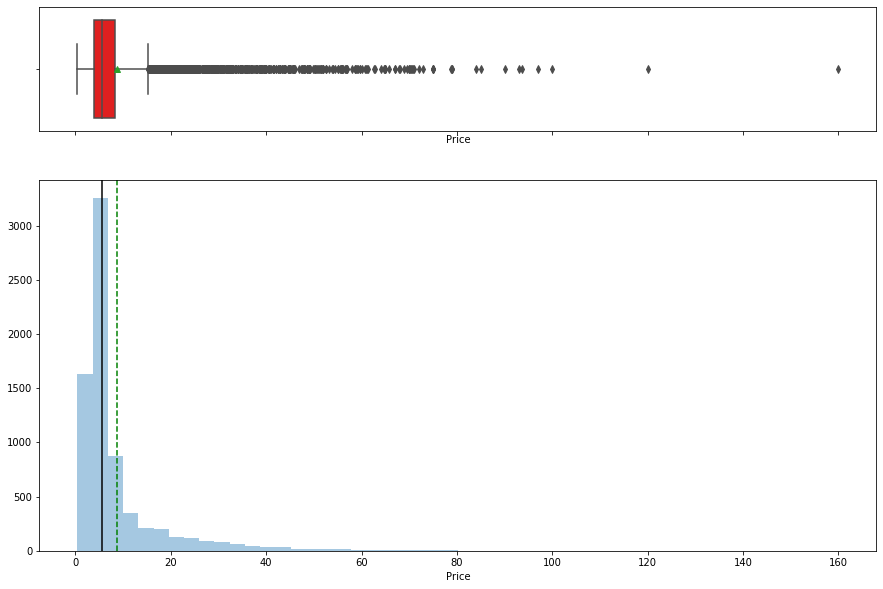

In [61]:
histogram_boxplot(uc.Price)

#### Observations : Consider the price in INR Lakhs (1 Lakh = 100, 000)
- The distribution of Price is highly right skewed
- Majority of the prices are close to 5
- Median Price is ~6 but the mean is ~9
- There are a lot of outliers in this variable

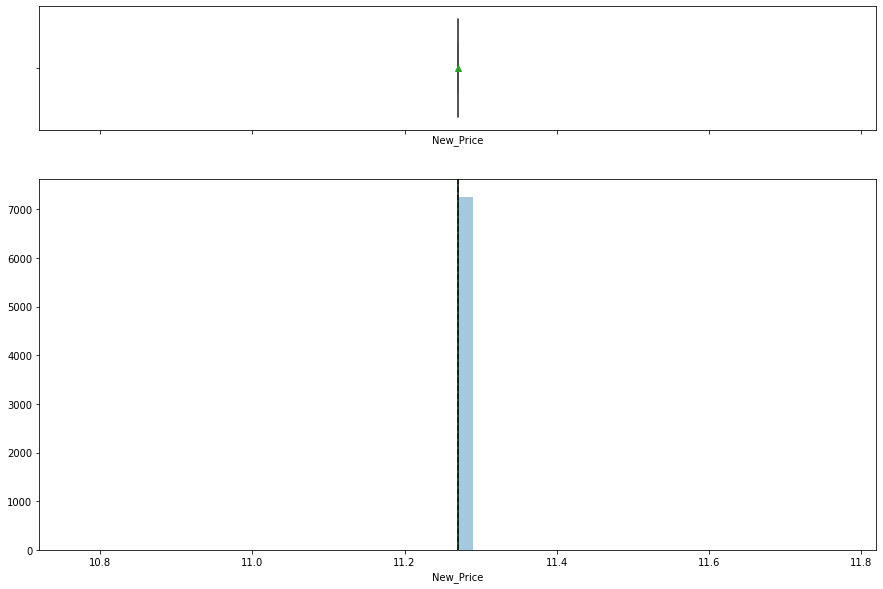

In [160]:
histogram_boxplot(uc.New_Price)

#### Observations 
- There a lot missing data in the column New_Price, but still we can see that the price of a new car is higher than a used car. Also with many variations in the price of each type of car.

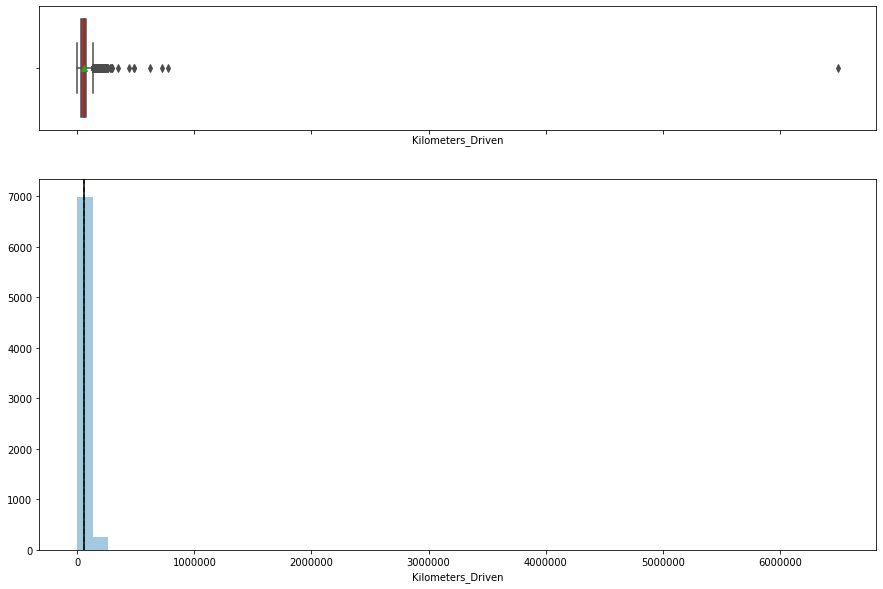

In [62]:
histogram_boxplot(uc.Kilometers_Driven)

#### Observations : The total kilometers driven in the car by the previous owner(s) in KM.
- Kilometers is right skewed
- Media and Mean are almost the same
- It shows outliers extremely to the right, indicating that there are cars with long kilometers traveled.

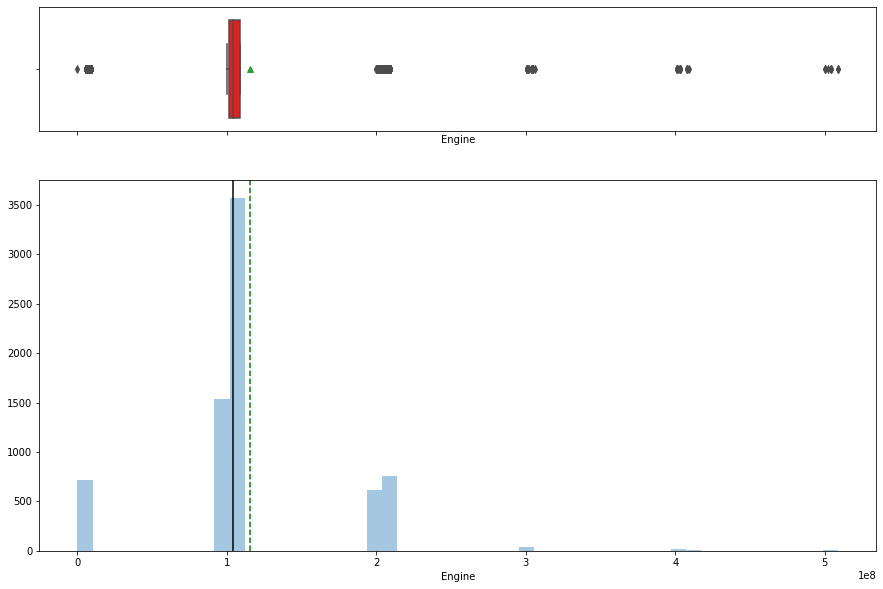

In [303]:
histogram_boxplot(uc.Engine)

- About Engine has a lot unique values. The most concentration is around 1.

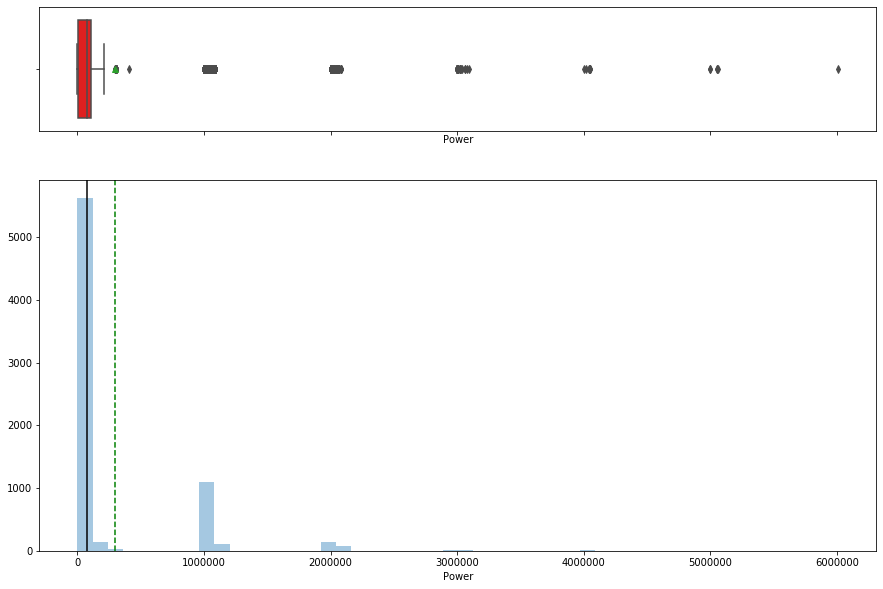

In [63]:
histogram_boxplot(uc.Power)

#### Observations
- Power is right skewed
- Mean ~3 and Media 8 

In [28]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

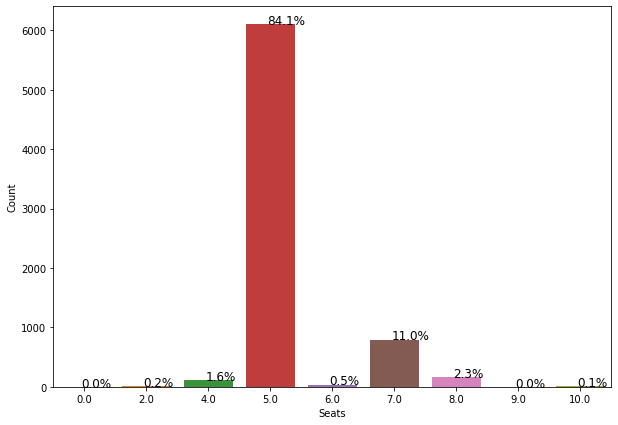

In [29]:
plt.figure(figsize=(10,7))
ax = sns.countplot(uc['Seats'])
plt.xlabel('Seats')
plt.ylabel('Count')
bar_perc(ax,uc['Seats'])

#### Observations: 
- Majority of the cars has 5 seats
- There are large cars in this data with 7 and 8 seat

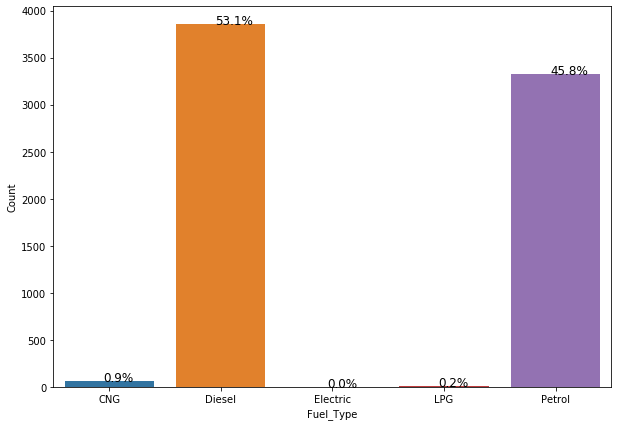

In [30]:
plt.figure(figsize=(10,7))
ax = sns.countplot(uc['Fuel_Type'])
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
bar_perc(ax,uc['Fuel_Type'])

#### Observations:
- The majority of the cars works with Diesel, followed by Petrol

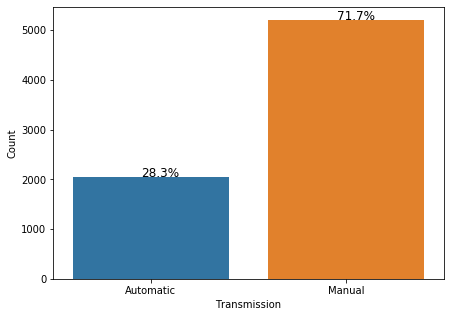

In [31]:
plt.figure(figsize=(7,5))
ax = sns.countplot(uc['Transmission'])
plt.xlabel('Transmission')
plt.ylabel('Count')
bar_perc(ax,uc['Transmission'])


#### Observations:
- The majority of cars on the data have Manual Transmission

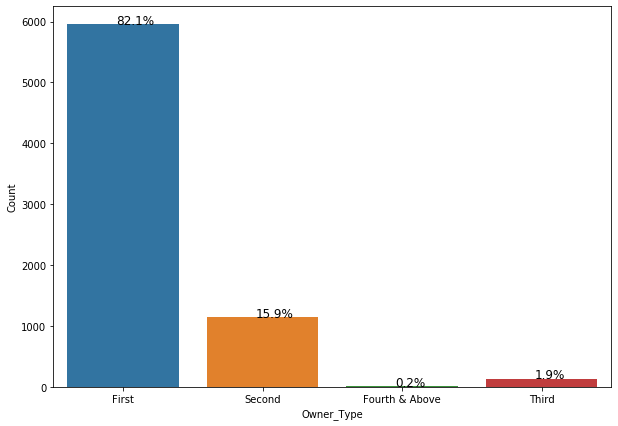

In [32]:
plt.figure(figsize=(10,7))
ax = sns.countplot(uc['Owner_Type'])
plt.xlabel('Owner_Type')
plt.ylabel('Count')
bar_perc(ax,uc['Owner_Type'])

#### Observations:
- The majority of the used cars had only 1 previous owner

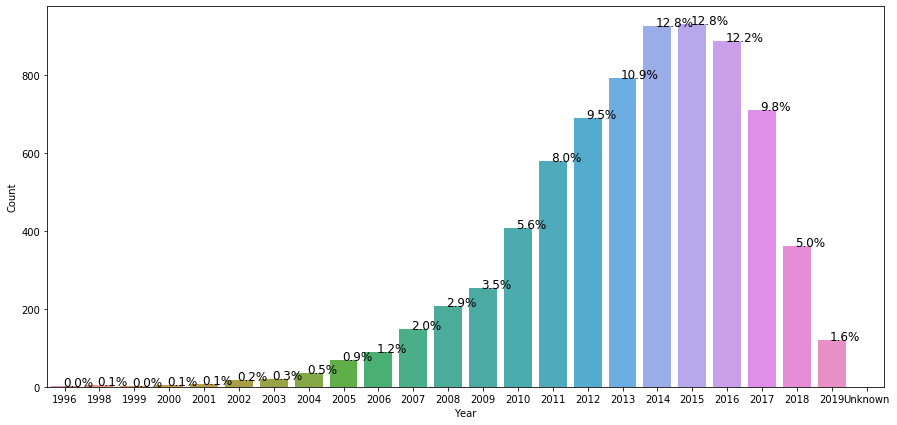

In [33]:
plt.figure(figsize=(15,7))
ax = sns.countplot(uc['Year'])
plt.xlabel('Year')
plt.ylabel('Count')
bar_perc(ax,uc['Year'])

#### Observations
- Most cars were manufactured between 2014 and 2016, while the minority are from 1998 to 2009

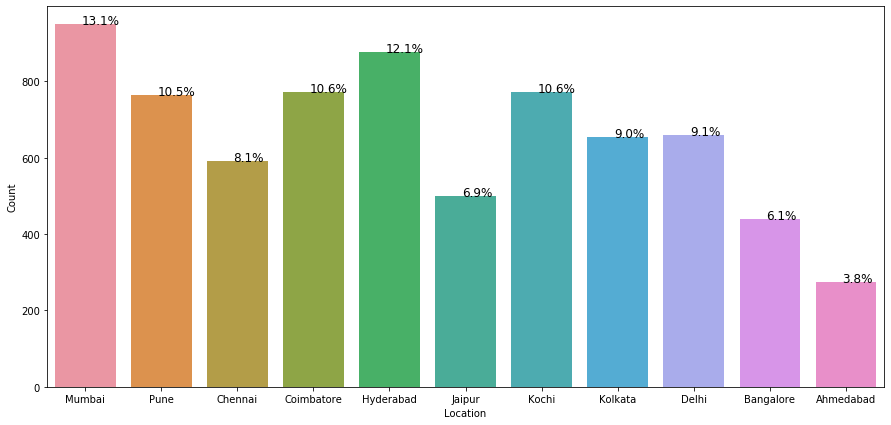

In [34]:
plt.figure(figsize=(15,7))
ax = sns.countplot(uc['Location'])
plt.xlabel('Location')
plt.ylabel('Count')
bar_perc(ax,uc['Year'])

#### Observations 
- The location of Mumbai is the most popular to sell used cars, followed by Hyderabad.

In [35]:
uc.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

### Bivariate Analysis

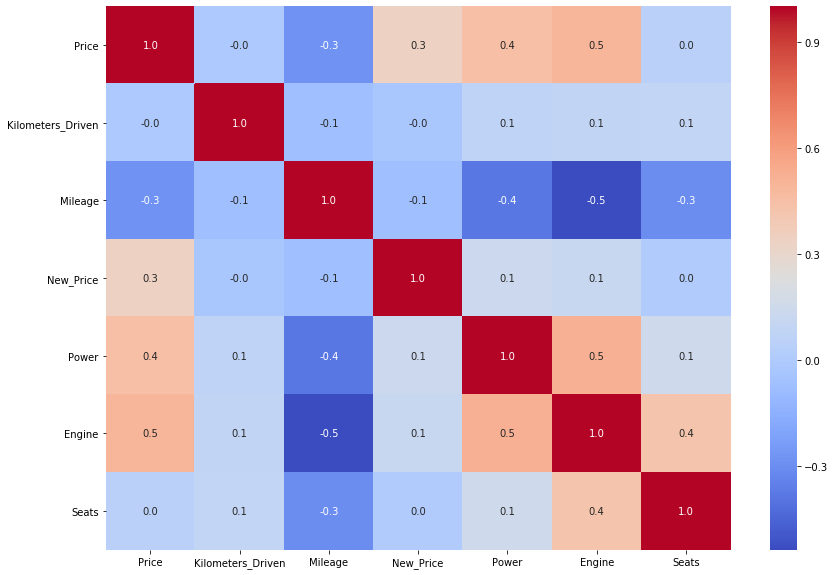

In [36]:
# Check for correlation among numerical variables
num_var = ['Price','Kilometers_Driven','Mileage','New_Price', 'Power', 'Engine','Seats']

corr = uc[num_var].corr()

# plot the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### Observations 
- Mileage is negatively correlated with Price. Is the Mileage is low, the Price can be high.( Mileage : The standard mileage offered by the car company in kmpl or km/kg)
- Power and Engine shows good correlation with price
- Seats and Engine shows correlation. 

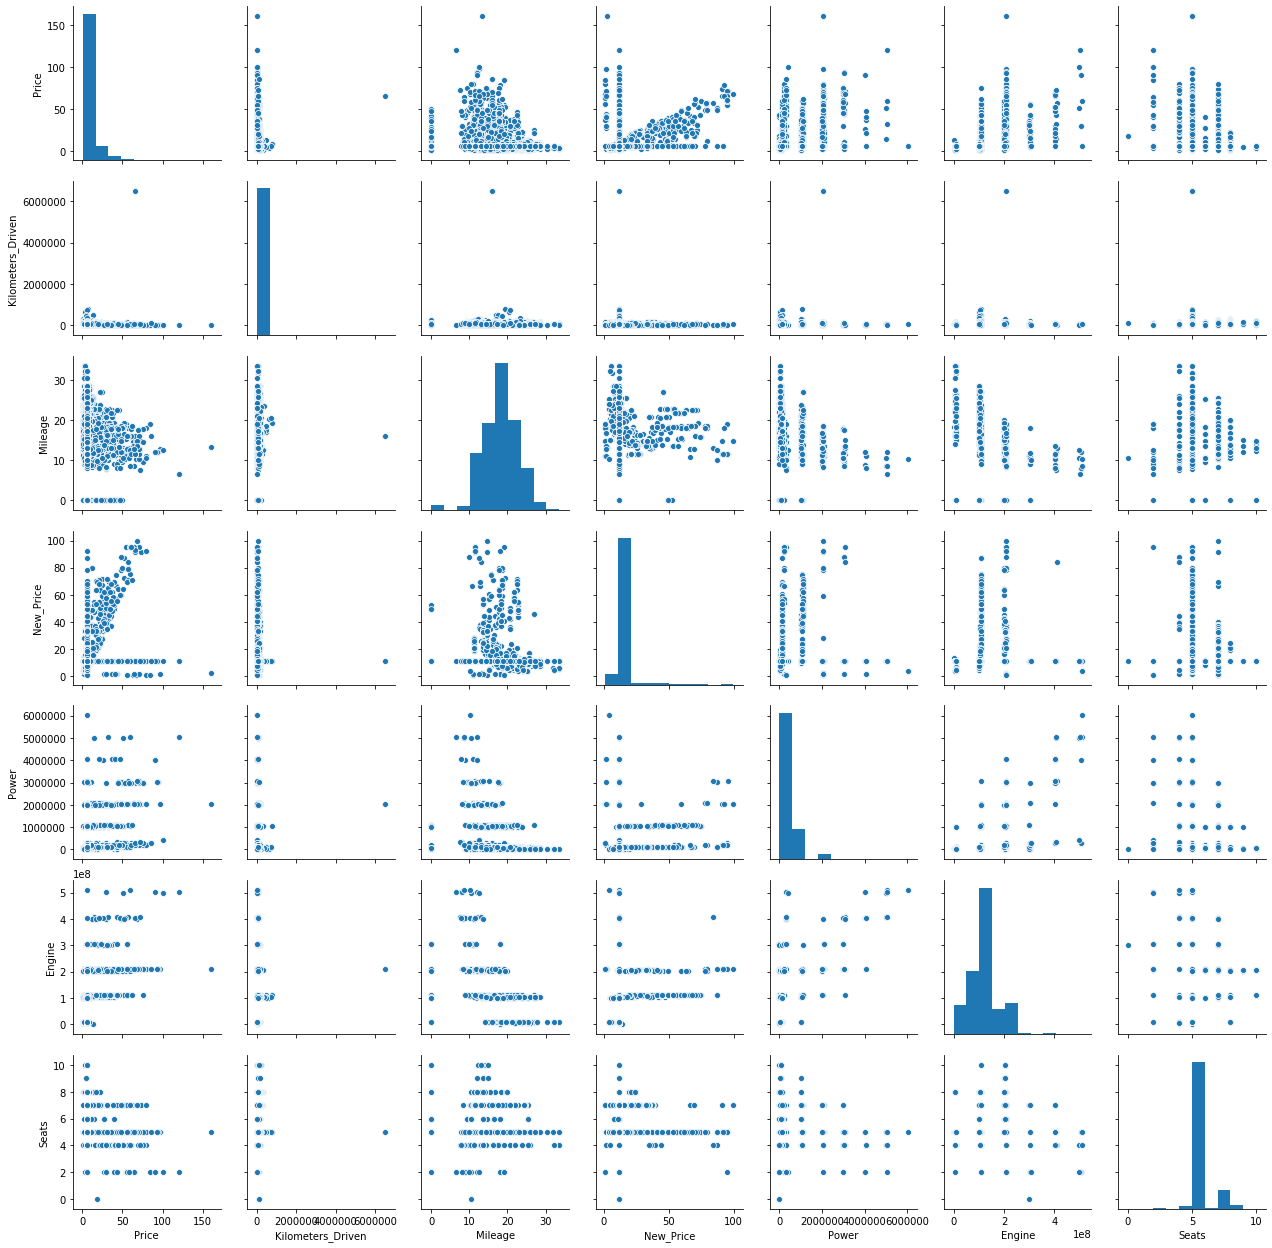

In [37]:
sns.pairplot(uc[num_var])

Text(0.5, 0, 'Location')

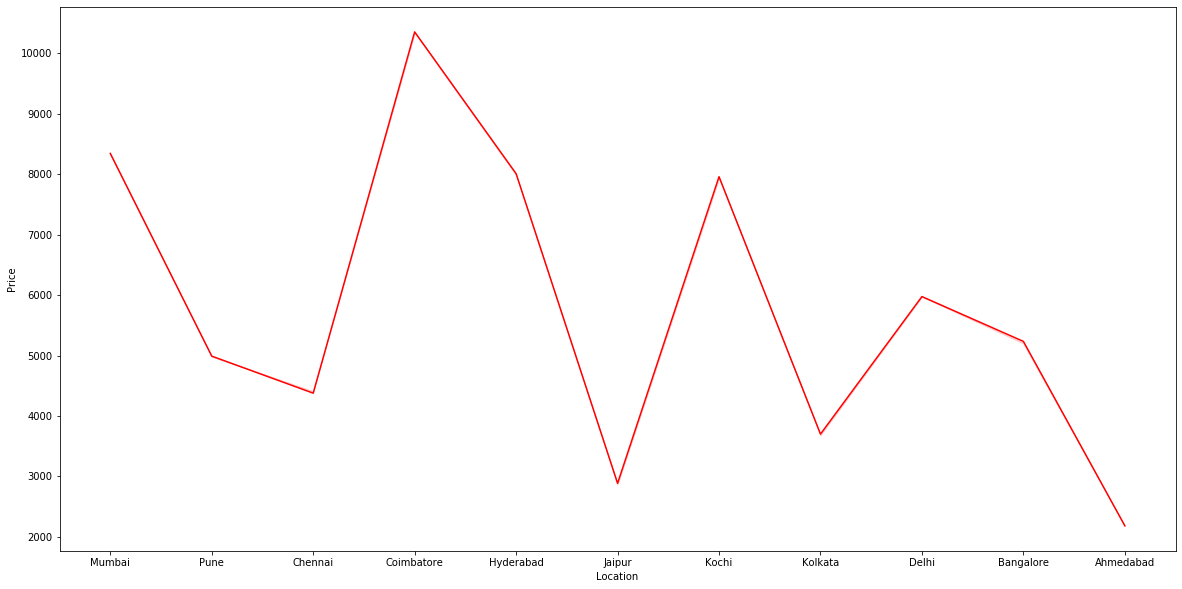

In [74]:
cats = uc.Location.unique().tolist()
uc.Location = pd.Categorical(uc.Location, ordered=True, categories=cats)

plt.figure(figsize=(20,10))
sns.lineplot(x="Location", y="Price",data=uc,ci=0,color="RED",estimator='sum')
plt.ylabel('Price')
plt.xlabel('Location')

In [38]:
uc.columns
uc.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

#### Observations
- The location Coimbatore shows the high price, while the Jaipur shows the low prices

In [39]:
(uc.groupby('Transmission')['Price']
         .agg(['mean','sum'])
         .style.format('${0:,.2f}'))

,mean,sum
Transmission,,
Automatic,$17.56,"$35,987.19"
Manual,$5.39,"$28,029.49"


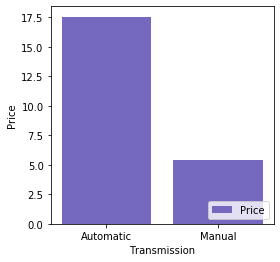

In [40]:
plt.figure(figsize = (4,4)) # To resize the plot

# Plot Car prices dependent on the Transmission
sns.barplot(x="Transmission", y="Price", data=uc.sort_values("Name", ascending=False),
            label="Price", color="slateblue", ci=None)

# Add a legend
plt.legend(ncol=3, loc="lower right", frameon=True)
plt.show()

#### Observations 
- Automatic Transmission has a higher price than manual

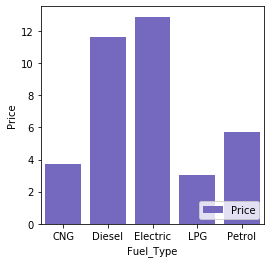

In [41]:
plt.figure(figsize = (4,4)) # To resize the plot

# Plot Car prices dependent on the Fuel_Type was used
sns.barplot(x="Fuel_Type", y="Price", data=uc.sort_values("Name", ascending=False),
            label="Price", color="slateblue", ci=None)

# Add a legend
plt.legend(ncol=3, loc="lower right", frameon=True)
plt.show()

#### Observations
- Electric cars tend to be more expensive

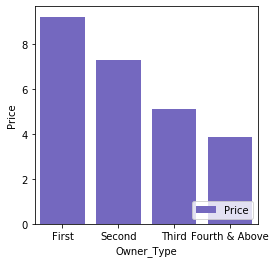

In [42]:
plt.figure(figsize = (4,4)) # To resize the plot

# Plot Car prices dependent on the Transmission
sns.barplot(x="Owner_Type", y="Price", data=uc.sort_values("Name", ascending=False),
            label="Price", color="slateblue", ci=None)

# Add a legend
plt.legend(ncol=3, loc="lower right", frameon=True)
plt.show()

#### Observations
- A used car with only one previous owner tends to be more expensive.

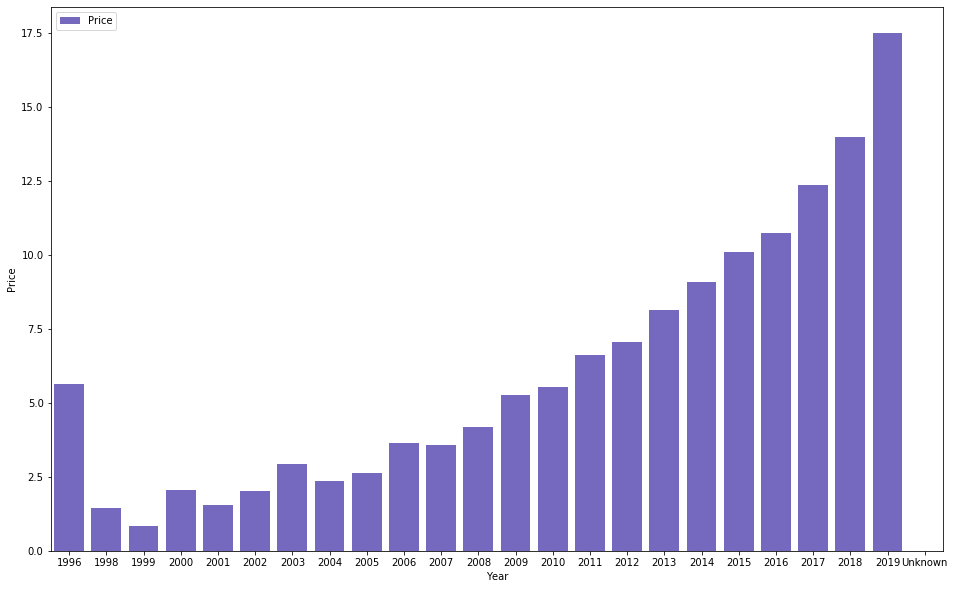

In [43]:
plt.figure(figsize = (16,10)) # To resize the plot

# Plot Plot Car prices dependent on the year was manufactured
sns.barplot(x="Year", y="Price", data=uc.sort_values("Year", ascending=True),
            label="Price", color="slateblue", ci=None)

# Add a legend
plt.legend(ncol=2, loc="higher right", frameon=True)
plt.show()

#### Observations
- Like as expected, the newest car, in this case, 2019, tend to carry the highest price. The same idea follows in the years of 2018, 2017 and so on.

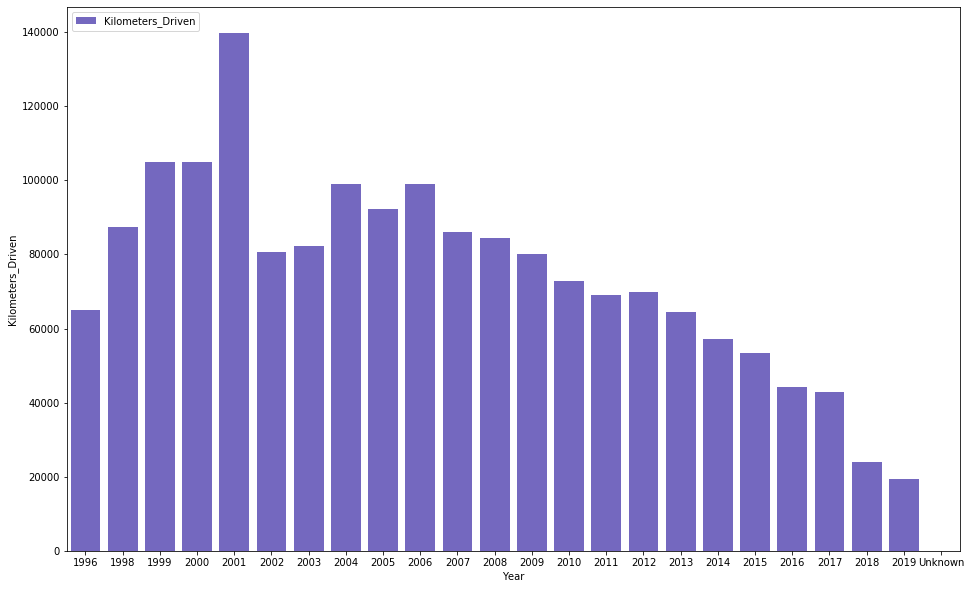

In [44]:
plt.figure(figsize = (16,10)) # To resize the plot

# Plot Plot Car prices dependent on the year was manufactured
sns.barplot(x="Year", y="Kilometers_Driven", data=uc.sort_values("Year", ascending=True),
            label="Kilometers_Driven", color="slateblue", ci=None)

# Add a legend
plt.legend(ncol=2, loc="higher right", frameon=True)
plt.show()

#### Observations 
- There are cars manufactured a long time ago, but with kilometers run less than the newer cars.

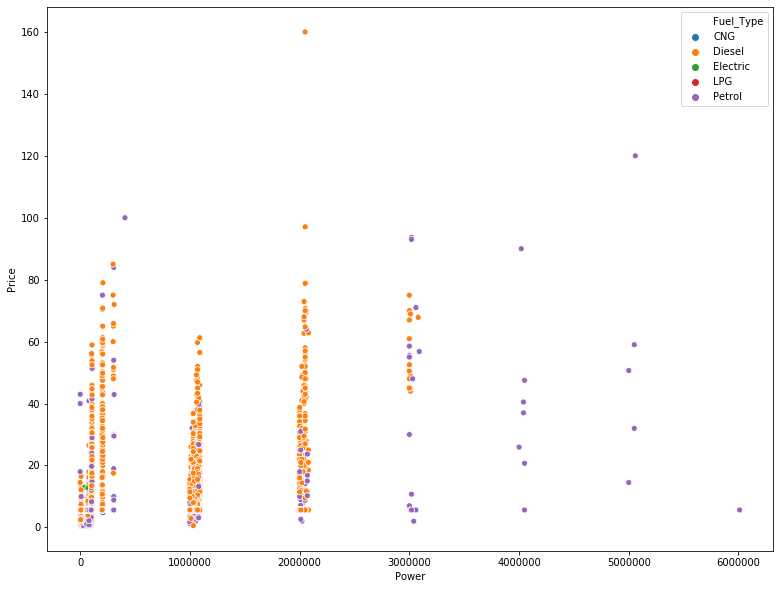

In [45]:
plt.figure(figsize=(13,10))
sns.scatterplot(y='Price', x='Power', hue='Fuel_Type', data=uc);

### Observations
- Used cars with more power tend to cost more.
- However, the Electric car that is not showing high power, still carry an expensive price
- Used cars with Fuel Type Diesel can cost a little more, due to the cost of this fuel type be more economical in the market.

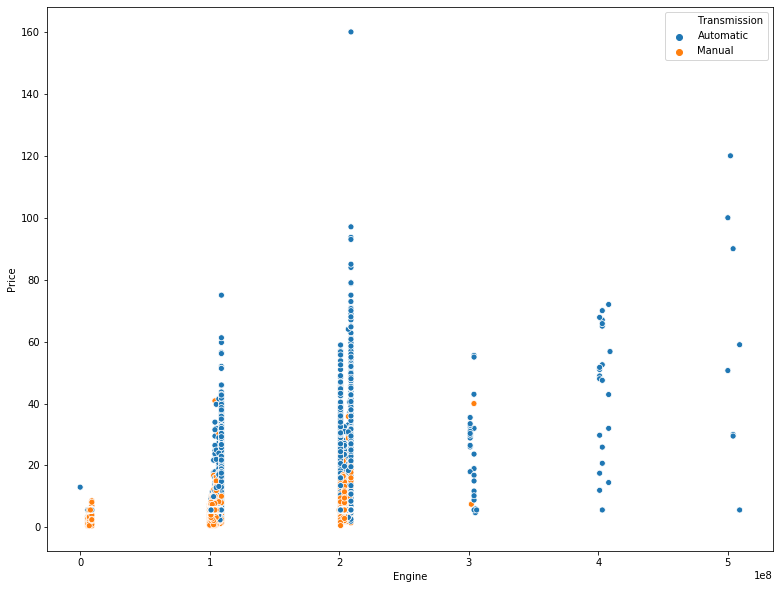

In [51]:
plt.figure(figsize=(13,10))
sns.scatterplot(y='Price', x='Engine', hue="Transmission", data=uc);

#### Observations
- The used cars concentrates in the group of Engine ~2 in CC.
- High Engine concentrates expensive cars. 
- Engine is related to the year the car was manufactured. 

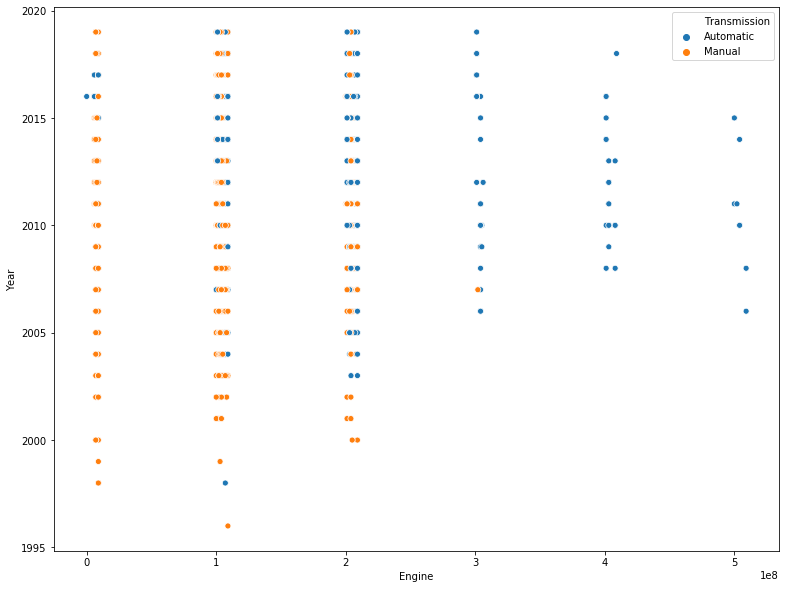

In [52]:
plt.figure(figsize=(13,10))
sns.scatterplot(y='Year', x='Engine', hue="Transmission", data=uc);

In [83]:
uc.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

### Outliers Treatment

In [55]:
# Lets treat outliers
def treat_outliers(uc,Kilometers_Driven):
    '''
    treats outliers in a variable
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=uc[Kilometers_Driven].quantile(0.25) # 25th quantile
    Q3=uc[Kilometers_Driven].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    uc[Kilometers_Driven] = np.clip(uc[Kilometers_Driven], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return uc

def treat_outliers_all(uc, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        uc = treat_outliers(uc,c)
        
    return uc

In [56]:
numerical_col = uc.select_dtypes(include=np.number).columns.tolist()
uc = treat_outliers_all(uc,numerical_col)

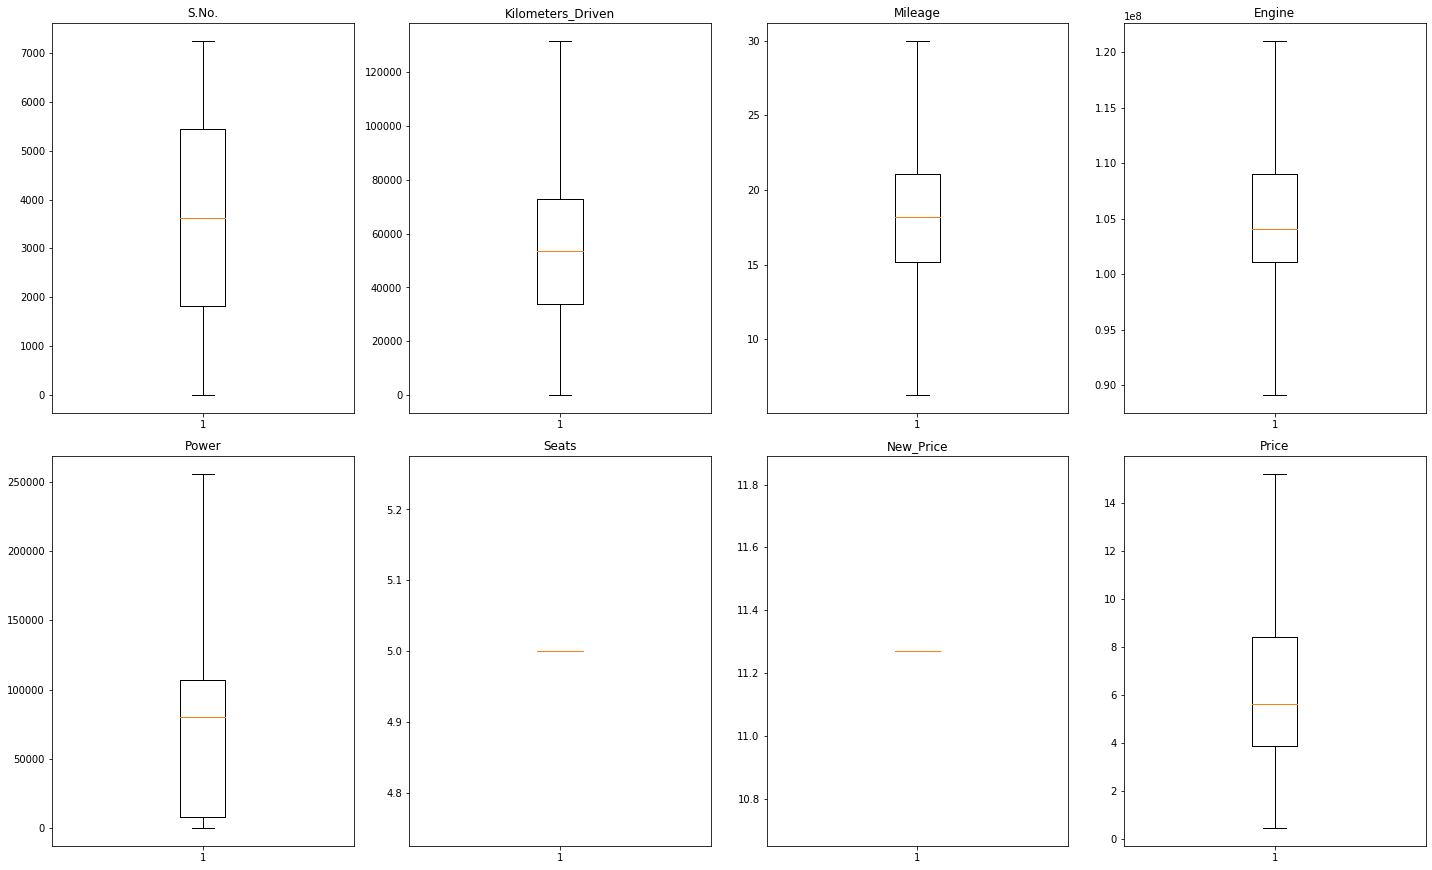

In [57]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(uc[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

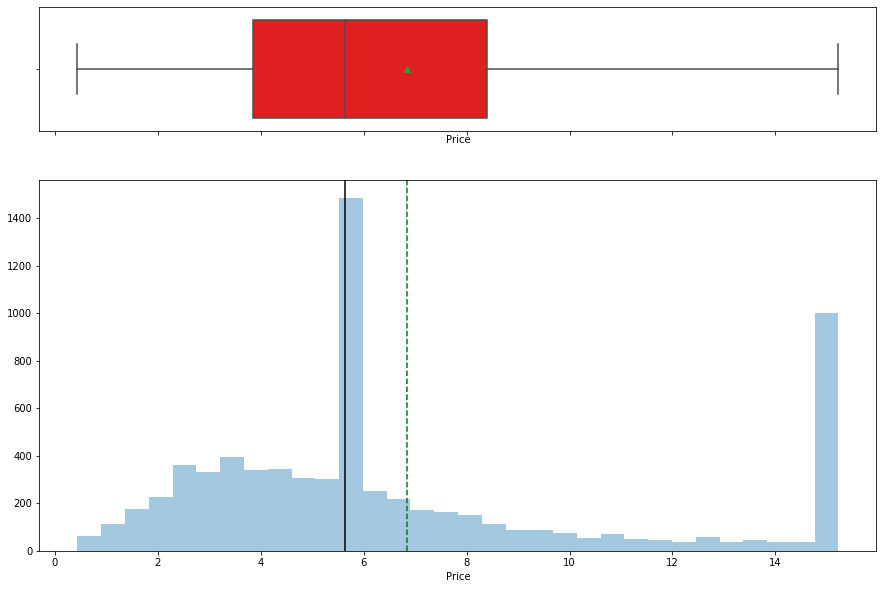

In [58]:
histogram_boxplot(uc.Price)

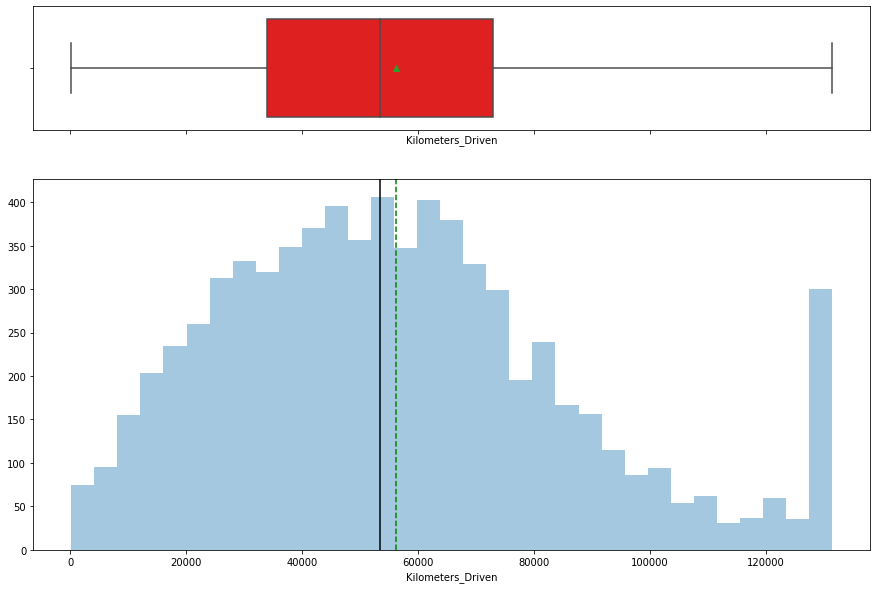

In [139]:
histogram_boxplot(uc.Kilometers_Driven)

#### Observations 
- Outliers has been treated

### Model Building

In [140]:
uc.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,89135800.0,5080.0106,5.0,11.27,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,105080200.0,102060.0200,5.0,11.27,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,101090900.0,8080.0700,5.0,11.27,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,102040800.0,8080.0706,5.0,11.27,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,109060800.0,104000.0800,5.0,11.27,15.225


In [141]:
#Defining X and y variables
X = uc.drop(['Price','Name','New_Price','S.No.'], axis=1)
y = uc[['Price']]

print(X.head())
print(y.head())

     Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage       Engine        Power  Seats  
0    26.60   89135800.0    5080.0106    5.0  
1    19.67  105080200.0  102060.0200    5.0  
2    18.20  101090900.0    8080.0700    5.0  
3    20.77  102040800.0    8080.0706    5.0  
4    15.20  109060800.0  104000.0800    5.0  
    Price
0   1.750
1  12.500
2   4.500
3   6.000
4  15.225


#### Observations 
- Dependent Variable y = Price
- Key Variables with strong Relationship with Price: Location, Year, Kilometer_Driven, Transmission, Engine, Power. Key Variables with not so strong Relationship, but still can influence the price: Fuel_Type, Owner_Type, Seats.

In [142]:
print(X.shape)
print(y.shape)

(7253, 10)
(7253, 1)


### Dummy Variables

In [143]:
X = pd.get_dummies(X, columns=['Location','Transmission','Year','Fuel_Type','Owner_Type'], drop_first=True)
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Year_2018,Year_2019,Year_Unknown,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,89135800.0,5080.0106,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,105080200.0,102060.0200,5.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,46000,18.20,101090900.0,8080.0700,5.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,87000,20.77,102040800.0,8080.0706,5.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,40670,15.20,109060800.0,104000.0800,5.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


#### Split the data into train and test

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Fitting linear Model

In [145]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)

Intercept of the linear equation: [-0.38355073]

COefficients of the equation are: [[-1.16843642e-05 -1.37640464e-01  1.03391920e-07  6.31157399e-06
   6.17110940e-09  3.46022309e-01 -7.38856591e-02  4.33978047e-01
  -3.54691699e-01  3.39730285e-01 -2.21949693e-01 -5.00106806e-02
  -8.03558913e-01 -1.48440058e-01 -8.84399902e-02 -2.79082869e+00
  -5.27810390e-01 -1.84979871e+00  1.45800385e+00 -2.81440410e+00
  -1.56708435e+00 -1.23679801e+00 -1.83465911e+00 -2.47572064e+00
  -1.66802099e+00 -1.38400083e+00 -1.17111021e+00 -1.09221430e+00
  -2.93505955e-01  6.30001846e-03  7.03629750e-01  1.09844226e+00
   1.48180978e+00  1.83691273e+00  2.37447446e+00  2.73380486e+00
   3.19326502e+00  3.02848490e+00  1.17239551e-13  4.33831373e-01
   4.73552095e+00 -5.29328449e-01 -1.09433984e+00  5.03907927e-01
  -7.38609556e-02 -8.70929476e-01]]


#### Observations
- Intercept of the linear equation is close to zero

#### Check Model Performance

In [146]:
mean_absolute_error(y_test, pred) # Mean Absolute Error on test - MAE

1.8303261193601352

- Magnitude of the residuals, or MAE is 1.8303261193835374

In [147]:
mean_squared_error(y_test, pred)**0.5 #Root Mean Square Error pn test - RMSE

2.433667498997139

- RMSE: 2.433667499023676

In [148]:
r2_score(y_test, pred) #R2 Squared

0.6766281608426503

In [149]:
linearregression.score(X_train, y_train) #Training Score

0.6398262536218953

In [150]:
linearregression.score(X_test, y_test) #Testing Score

0.6766281608426503

#### Conclusion: 
- This is the regression score function
- R2_score is 67.66%. In this model independent variables are able to explain 67.66% of variances in dependent variable.
- The Training Score is 64% and the Testing scores are ~ 68%, hence the model is considered a moderate fit. One set is not overfitting another.


### Statsmodel

In [154]:
import statsmodels.api as sm

In [159]:
# Lets us build linear regression model using statsmodel 
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     207.9
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:24:58   Log-Likelihood:                -11881.
No. Observations:                5077   AIC:                         2.385e+04
Df Residuals:                    5033   BIC:                         2.414e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Kilometers_Driven     

### Observations 
- R-squared values is 0.640
- If 0.05 in P is significante level, any variable less than 0.05 is considered significant: Kilometer, Engine, Power, Mileage, Transmission_Manual, some locations and some year, Fuel_Petrol, Owner_Type_Third
- Negative Values of coefficient shows that Price decrease if Kilometers_Driven
- Engine and Power has a high positive Coefficient, which means Price increase if both variables increase

### Checking Linear Regression Assumptions 
- Check Muticollinearity using VIF score

In [435]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Kilometers_Driven               1.896286
Mileage                         3.024081
Engine                          3.927231
Power                           2.115814
Seats                        8119.651713
Location_Pune                   1.725286
Location_Chennai                1.596482
Location_Coimbatore             1.740347
Location_Hyderabad              1.828738
Location_Jaipur                 1.527863
Location_Kochi                  1.737172
Location_Kolkata                1.605040
Location_Delhi                  1.571880
Location_Bangalore              1.410167
Location_Ahmedabad              1.260816
Transmission_Manual             1.417340
Year_1998                       5.023198
Year_1999                       3.006385
Year_2000                       6.010876
Year_2001                       9.035313
Year_2002                      19.024683
Year_2003                      21.007977
Year_2004                      35.925335
Year_2005             

### Observations 
- VIF or Variance Inflation Factor of Seats shows signs of high multi-collinearity, due to the score exceed 10.

### Removing Multicollinearity

In [436]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('Seats', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Kilometers_Driven              1.868150
Mileage                        3.063092
Engine                         4.054308
Power                          2.174057
Location_Pune                  1.709810
Location_Chennai               1.605358
Location_Coimbatore            1.773045
Location_Hyderabad             1.815472
Location_Jaipur                1.555743
Location_Kochi                 1.769035
Location_Kolkata               1.603478
Location_Delhi                 1.587897
Location_Bangalore             1.420840
Location_Ahmedabad             1.264730
Transmission_Manual            1.415606
Year_1998                      1.482038
Year_1999                      1.329964
Year_2000                      1.314044
Year_2001                      1.912230
Year_2002                      3.767731
Year_2003                      3.537435
Year_2004                      5.736263
Year_2005                      9.758588
Year_2006                     11.970126
Year_

### Observations
- Dropping the variable Seats helped the VIF come downs.

In [438]:
# we drop the one with the highest vif values and check the Adjusted-R Squared on this case: Fuel_Type_Diesel
X_train2 = X_train1.drop('Fuel_Type_Diesel', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Kilometers_Driven            1.867477e+00
Mileage                      3.062819e+00
Engine                       3.977453e+00
Power                        2.173341e+00
Seats                        0.000000e+00
Location_Pune                1.709772e+00
Location_Chennai             1.602205e+00
Location_Coimbatore          1.768954e+00
Location_Hyderabad           1.809928e+00
Location_Jaipur              1.550019e+00
Location_Kochi               1.768945e+00
Location_Kolkata             1.598590e+00
Location_Delhi               1.587875e+00
Location_Bangalore           1.419192e+00
Location_Ahmedabad           1.264401e+00
Transmission_Manual          1.415548e+00
Year_1998                    3.502021e+12
Year_1999                    6.891507e+12
Year_2000                    8.455876e+11
Year_2001                    5.458909e+13
Year_2002                    7.569075e+13
Year_2003                    5.031955e+13
Year_2004                    1.012045e+14

### Observations
- Dropping the variable Fuel_Type_Diesel helped the VIF come downs. Now we can say features are not correlated, less than 10.

In [454]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     212.8
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:55:22   Log-Likelihood:                -11881.
No. Observations:                5077   AIC:                         2.385e+04
Df Residuals:                    5034   BIC:                         2.413e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Kilometers_Driven     

- Adjusted-R squared for  OLSmod2 is the same as for OLSmod 1, i.e. when we drop Seats and Fuel_Type_Diesel

### Checking the Highest P value greater than 0.05

In [455]:
X_train4 = X_train3.drop(['Seats'], axis=1)

In [457]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     212.8
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:56:15   Log-Likelihood:                -11881.
No. Observations:                5077   AIC:                         2.385e+04
Df Residuals:                    5034   BIC:                         2.413e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Kilometers_Driven     

In [458]:
X_train5 = X_train4.drop(['Owner_Type_Fourth & Above'], axis=1)

In [459]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     218.0
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:56:54   Log-Likelihood:                -11881.
No. Observations:                5077   AIC:                         2.385e+04
Df Residuals:                    5035   BIC:                         2.412e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Kilometers_Driven   -1.164e-05   1

In [460]:
X_train6 = X_train5.drop(['Year_Unknown'], axis=1)

In [461]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     218.0
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:57:19   Log-Likelihood:                -11881.
No. Observations:                5077   AIC:                         2.385e+04
Df Residuals:                    5035   BIC:                         2.412e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Kilometers_Driven   -1.164e-05   1

In [462]:
X_train7 = X_train6.drop(['Location_Jaipur'], axis=1)

In [463]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     223.5
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:58:33   Log-Likelihood:                -11881.
No. Observations:                5077   AIC:                         2.384e+04
Df Residuals:                    5036   BIC:                         2.411e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Kilometers_Driven   -1.174e-05   1

In [464]:
X_train8 = X_train7.drop(['Year_2011'], axis=1)

In [465]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1158.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:01:17   Log-Likelihood:                         -11882.
No. Observations:                5077   AIC:                                  2.384e+04
Df Residuals:                    5037   BIC:                                  2.410e+04
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [466]:
X_train9 = X_train8.drop(['Year_1998'], axis=1)

In [470]:
olsmod8 = sm.OLS(y_train, X_train9)
olsres8 = olsmod8.fit()
print(olsres8.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1188.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:09:55   Log-Likelihood:                         -11882.
No. Observations:                5077   AIC:                                  2.384e+04
Df Residuals:                    5038   BIC:                                  2.410e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [468]:
X_train10 = X_train9.drop(['Location_Pune'], axis=1)

In [471]:
olsmod9 = sm.OLS(y_train, X_train10)
olsres9 = olsmod9.fit()
print(olsres9.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1219.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:10:21   Log-Likelihood:                         -11882.
No. Observations:                5077   AIC:                                  2.384e+04
Df Residuals:                    5039   BIC:                                  2.409e+04
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [472]:
X_train11 = X_train10.drop(['Location_Chennai'], axis=1)

In [473]:
olsmod10 = sm.OLS(y_train, X_train11)
olsres10 = olsmod10.fit()
print(olsres10.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1252.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:11:59   Log-Likelihood:                         -11882.
No. Observations:                5077   AIC:                                  2.384e+04
Df Residuals:                    5040   BIC:                                  2.408e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [474]:
X_train12 = X_train11.drop(['Location_Kochi'], axis=1)

In [475]:
olsmod11 = sm.OLS(y_train, X_train12)
olsres11 = olsmod11.fit()
print(olsres11.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1287.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:14:54   Log-Likelihood:                         -11882.
No. Observations:                5077   AIC:                                  2.384e+04
Df Residuals:                    5041   BIC:                                  2.407e+04
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [476]:
X_train13 = X_train12.drop(['Location_Ahmedabad'], axis=1)

In [477]:
olsmod12 = sm.OLS(y_train, X_train13)
olsres12 = olsmod12.fit()
print(olsres12.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1324.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                        0.00
Time:                        01:16:03   Log-Likelihood:                         -11882.
No. Observations:                5077   AIC:                                  2.383e+04
Df Residuals:                    5042   BIC:                                  2.406e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Observations 
- Now no features has P values greater than 0.05. The Feature X_train13 is the final with Oslres12 Final model
- Now the Adjusted R-squares is 0.901. The model is able to explain 90% of variance. 

### Checking rest of assumption on the Model olsres12

### Mean of residual should be 0 

In [479]:
residual=olsres12.resid
np.mean(residual)

-0.0002517074340394315

- Mean of Residual is close to 0

### Test for Linearity

In [480]:
residual=olsres12.resid
fitted=olsres12.fittedvalues #predicted values

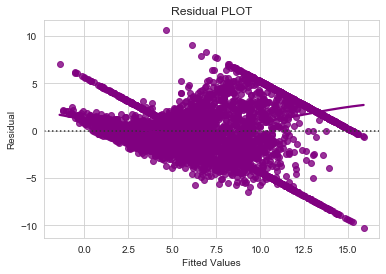

In [481]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

### Test for Normality

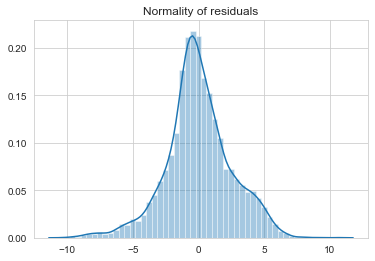

In [482]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

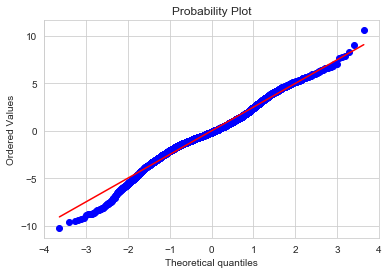

In [483]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [484]:
stats.shapiro(residual)

(0.9855082631111145, 2.0060860299692614e-22)

### Test for Homoscedasticity

In [485]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train13)
lzip(name, test)

[('F statistic', 1.0677712137335609), ('p-value', 0.05048386323701255)]

- With the p-value > 0.05, the residuals are homoscedastic. This assumption is therefore valid in the data.

### Predicting on the test data

In [486]:
X_train13.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Location_Coimbatore', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Delhi', 'Location_Bangalore', 'Transmission_Manual',
       'Year_1999', 'Year_2000', 'Year_2001', 'Year_2002', 'Year_2003',
       'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008',
       'Year_2009', 'Year_2010', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [487]:
X_test_final = X_test[X_train13.columns]

In [488]:
X_test_final.head()

,Kilometers_Driven,Mileage,Engine,Power,Location_Coimbatore,Location_Hyderabad,Location_Kolkata,Location_Delhi,Location_Bangalore,Transmission_Manual,...,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Second,Owner_Type_Third
2954,30000,20.4,101090700.0,8010.0800,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
6520,105000,23.2,102040800.0,7030.0904,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
6036,131500,13.8,103090900.0,60800.0000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6251,33750,15.6,101090600.0,7000.0002,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6735,35000,24.3,102040800.0,8080.0500,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [490]:
y_pred = olsres12.predict(X_test_final)

### Verify the performance on Train and Test: RMSE

In [491]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 2.5130035304297094
Test error: 2.436970875480625


In [493]:
olsmod12 = sm.OLS(y_train, X_train13)
olsres12 = olsmod12.fit()
print(olsres12.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1324.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                        0.00
Time:                        02:00:55   Log-Likelihood:                         -11882.
No. Observations:                5077   AIC:                                  2.383e+04
Df Residuals:                    5042   BIC:                                  2.406e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Observation
- This is the final model 

